In [18]:
#!pip install pandas
#!pip install sklearn
!pip install keras

Processing /Users/nilmeier@us.ibm.com/Library/Caches/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653/PyYAML-5.3.1-cp37-cp37m-macosx_10_14_x86_64.whl
You should consider upgrading via the '/Users/nilmeier@us.ibm.com/anaconda2/envs/p37-dojo/bin/python -m pip install --upgrade pip' command.


In [2]:
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
import types
import pandas as pd
#from botocore.client import Config
#import ibm_boto3

#def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
'''
client_f82def136c5d4899b8610de43f687965 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PGnZooRWtOvEFyEP5rqgnYZLyOz3sQJg5AlTsZpsP6wO',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config = Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f82def136c5d4899b8610de43f687965.get_object(Bucket='gpubetademo-donotdelete-pr-rwtfmswwezngs6',Key='household_power_consumption.txt')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body, sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
'''

dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
dataset.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
print(dataset.shape)
print(dataset.head())

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

In [4]:
import numpy as np
# mark all missing values
dataset.replace('?', np.nan, inplace=True)

In [5]:
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
dataset.to_csv("household_power_consumption.csv")

In [48]:
print(dataset.head())

# columns listed here 
dataset.keys()

dataset.head()

            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16            5180.8             0.0           546.0          4926.0   
2006-12-17           14398.6          2033.0          4187.0         13341.0   
2006-12-18            9247.2          1063.0          2621.0         14018.0   
2006-12-19            7094.0           839.0          7602.0          6197.0   
2006-12-20            9313.0        

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


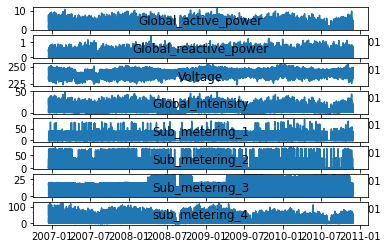

In [49]:
from matplotlib import pyplot

dpi = 300 #dots per square inch when plotting...higher resolution for publications.
pyplot.rcParams['figure.dpi']= dpi
pyplot.rcParams["figure.figsize"] = [4,4]    

# line plots
from pandas import read_csv
from matplotlib import pyplot
%matplotlib inline

# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure()


for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
    


pyplot.show()

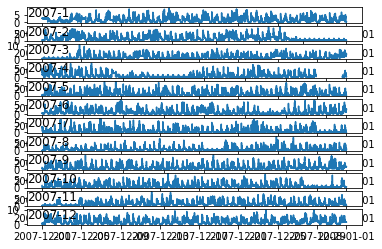

In [50]:
# monthly line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
#dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

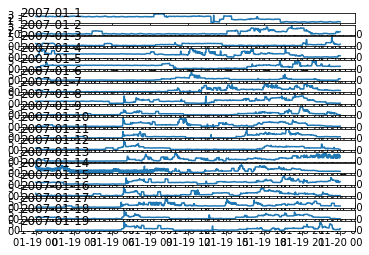

In [51]:
# daily line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
days = [x for x in range(1, 20)]
pyplot.figure()
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2007-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

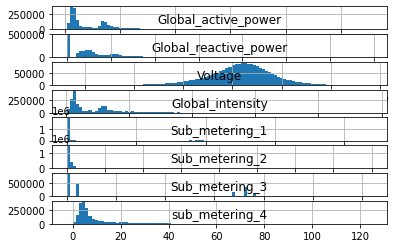

In [52]:
# histogram plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# histogram plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	dataset[name].hist(bins=100)
	pyplot.title(name, y=0)
pyplot.show()

In [53]:
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if np.isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]
                


# fill missing
fill_missing(dataset.values)

In [54]:
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = \
(values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [55]:
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [56]:
# resample minute data to total for each day
from pandas import read_csv

# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16            5180.8             0.0           546.0          4926.0   
2006-12-17           14398.6          2033.0          4187.0         13341.0   
2006-12-18            9247.2          1063.0          2621.0         14018.0   
2006-12-19            7094.0           839.0          7602.0          6197.0   
2006-12-20            9313

In [57]:
# multivariate multi-step encoder-decoder lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [58]:
# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

In [59]:
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

In [60]:
def to_multivariate_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0:2])
		# move along one time step
		in_start += 1
	return array(X), array(y)

In [61]:
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores

n_input = 14

# prepare data
train_x_old, train_y_old = to_supervised(train, n_input)
test_x_old, test_y_old = to_supervised(test, n_input)


train_x, train_y = to_multivariate_supervised(train, n_input)
test_x, test_y = to_multivariate_supervised(test, n_input)


In [62]:
test_x, test_y = to_multivariate_supervised(test, n_input)

print(np.shape(train_x))
print(np.shape(train_y))

(1092, 14, 8)
(1092, 7, 2)


# Model is loaded and trained here
extracted from build_model()

In [63]:
#n_timesteps, n_features, n_outputs
#train_x.shape

In [64]:
verbose, epochs, batch_size = 1, 50, 16
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
# reshape output into [samples, timesteps, features]
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], train_y.shape[2]))
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(RepeatVector(n_outputs))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(2)))
model.compile(loss='mse', optimizer='adam')
# fit network
model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/50
69/69 [==============================] - 2s 23ms/step - loss: 86478592.0000
Epoch 2/50
69/69 [==============================] - 2s 22ms/step - loss: 59740912.0000
Epoch 3/50
69/69 [==============================] - 2s 23ms/step - loss: 2637726.0000
Epoch 4/50
69/69 [==============================] - 1s 22ms/step - loss: 630062.3750
Epoch 5/50
69/69 [==============================] - 1s 21ms/step - loss: 219679.1094
Epoch 6/50
69/69 [==============================] - 1s 21ms/step - loss: 191856.4688
Epoch 7/50
69/69 [==============================] - 1s 21ms/step - loss: 177033.7812
Epoch 8/50
69/69 [==============================] - 1s 19ms/step - loss: 203652.2188
Epoch 9/50
69/69 [==============================] - 1s 20ms/step - loss: 235947.3750
Epoch 10/50
69/69 [==============================] - 1s 20ms/step - loss: 251202.3125
Epoch 11/50
69/69 [==============================] - 1s 20ms/step - loss: 160900.4844
Epoch 12/50
69/69 [==============================] - 1s 20

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               167200    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 7, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 7, 200)            320800    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 7, 100)            20100     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 7, 2)              202       
Total params: 508,302
Trainable params: 508,302
Non-trainable params: 0
_________________________________________________________________


# Function for making predictions

In [66]:
# make a forecast
def forecast(model, history, n_input):
    # flatten data
    data = array(history)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    # retrieve last observations for input data
    input_x = data[-n_input:, :]
    # reshape into [1, n_input, n]
    input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
    #print(input_x.shape)
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat, input_x

In [67]:
history = [x for x in train]
	# walk-forward validation over each week
predictions = list()
inputs = list()
for i in range(len(test)):
    # predict the week
    yhat_sequence, xhat_sequence = forecast(model, history, n_input)
    # store the predictions
    predictions.append(yhat_sequence)
    inputs.append(xhat_sequence)
    # get real observation and add to history for predicting the next week
    history.append(test[i, :])
# evaluate predictions days for each week
predictions = array(predictions)

In [68]:
data = array(history)
data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
input_x = data[-n_input:, :]
# reshape into [1, n_input, n]
input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
# forecast the next week
yhat = model.predict(input_x, verbose=0)
# we only want the vector forecast
yhat = yhat[0]

input_x.shape
yhat

array([[1919.8082 ,  202.22134],
       [2002.4738 ,  144.88846],
       [2003.7631 ,  241.26004],
       [2069.908  ,  215.3356 ],
       [2083.8494 ,  218.04996],
       [2153.1667 ,  136.7106 ],
       [2160.7878 ,  144.7189 ]], dtype=float32)

Taken from https://machinelearningmastery.com/how-to-load-and-explore-household-electricity-usage-data/

# Evaluating the forecasts

In [69]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        mse = 0
        for j in range(actual.shape[2]):
            # calculate mse
            mse = mean_squared_error(actual[:, i], predicted[:, i])
            # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    #for row in range(actual.shape[0]):
    #for col in range(actual.shape[1]):
    #s += (actual[row, col] - predicted[row, col])**2
    #score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return scores

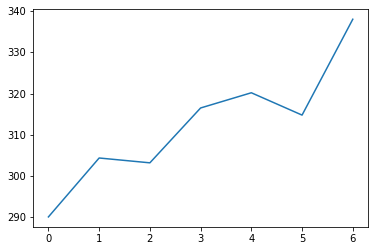

In [70]:
scores = evaluate_forecasts( test[:,:,0:2], predictions )
pyplot.plot(scores)

In [71]:
predictions.shape
test[:,:,0:2].shape
test_x.shape

(301, 14, 8)

In [72]:
print(test_y[0,:,:])
print(predictions[0,:,:])
print(np.subtract(test_y[0,:,:],predictions[0,:,:]))

[[1906.556  188.986]
 [1881.098  191.772]
 [2433.508  161.754]
 [2351.728  199.86 ]
 [2137.856  185.42 ]
 [1790.626  156.858]
 [2610.33   260.426]]
[[1848.0201   206.68912]
 [1901.6      164.2012 ]
 [1890.1288   168.97672]
 [1940.4374   164.74234]
 [1925.703    174.75113]
 [1972.5419   150.18472]
 [1963.7802   206.94351]]
[[  58.5358584   -17.70311743]
 [ -20.50197559   27.57079761]
 [ 543.37921582   -7.22271509]
 [ 411.29062207   35.11765991]
 [ 212.15299707   10.66887085]
 [-181.91587012    6.6732771 ]
 [ 646.54984863   53.48248804]]


In [73]:
print(test[:,:,0][0])
print(predictions[0])
#mse = mean_squared_error(test[:,:,0][0], predictions[0])
#print(sqrt(mse/7))

[2083.454 1604.132 2219.78  1777.18  1769.442 1797.208 2336.9  ]
[[1848.0201   206.68912]
 [1901.6      164.2012 ]
 [1890.1288   168.97672]
 [1940.4374   164.74234]
 [1925.703    174.75113]
 [1972.5419   150.18472]
 [1963.7802   206.94351]]


(46, 7, 2)


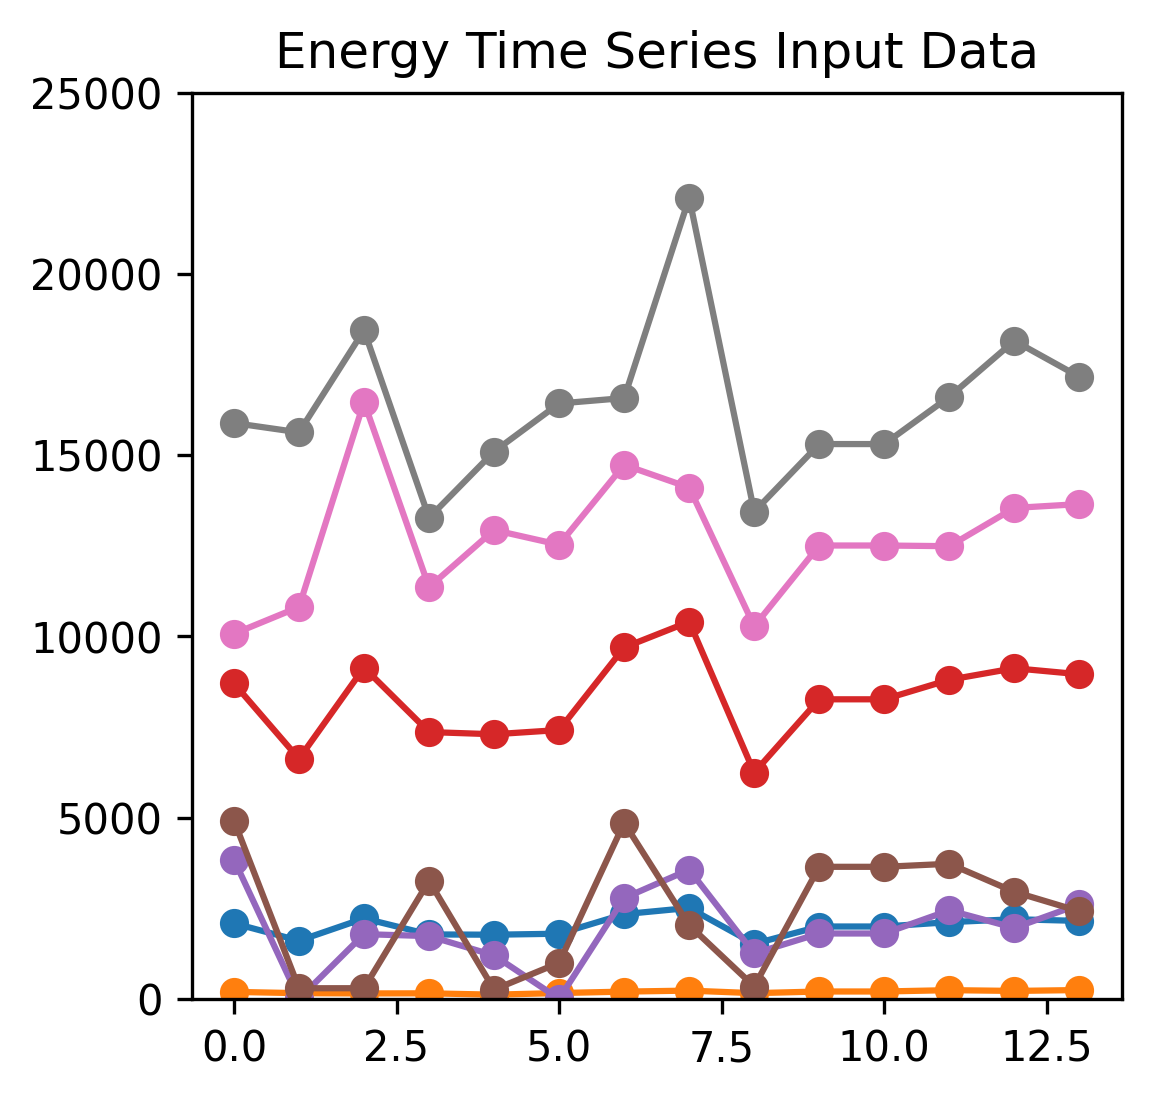

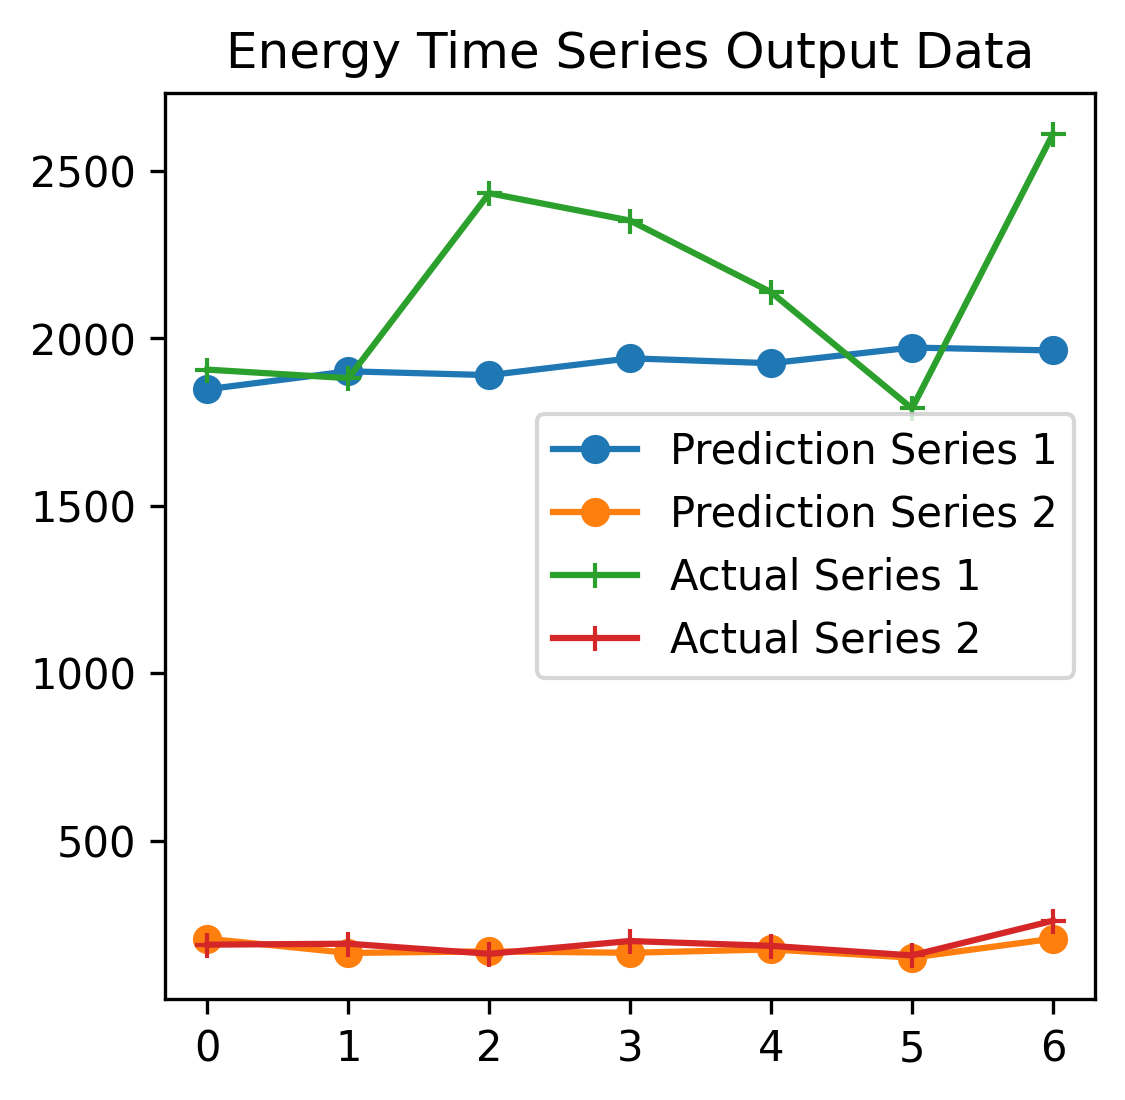

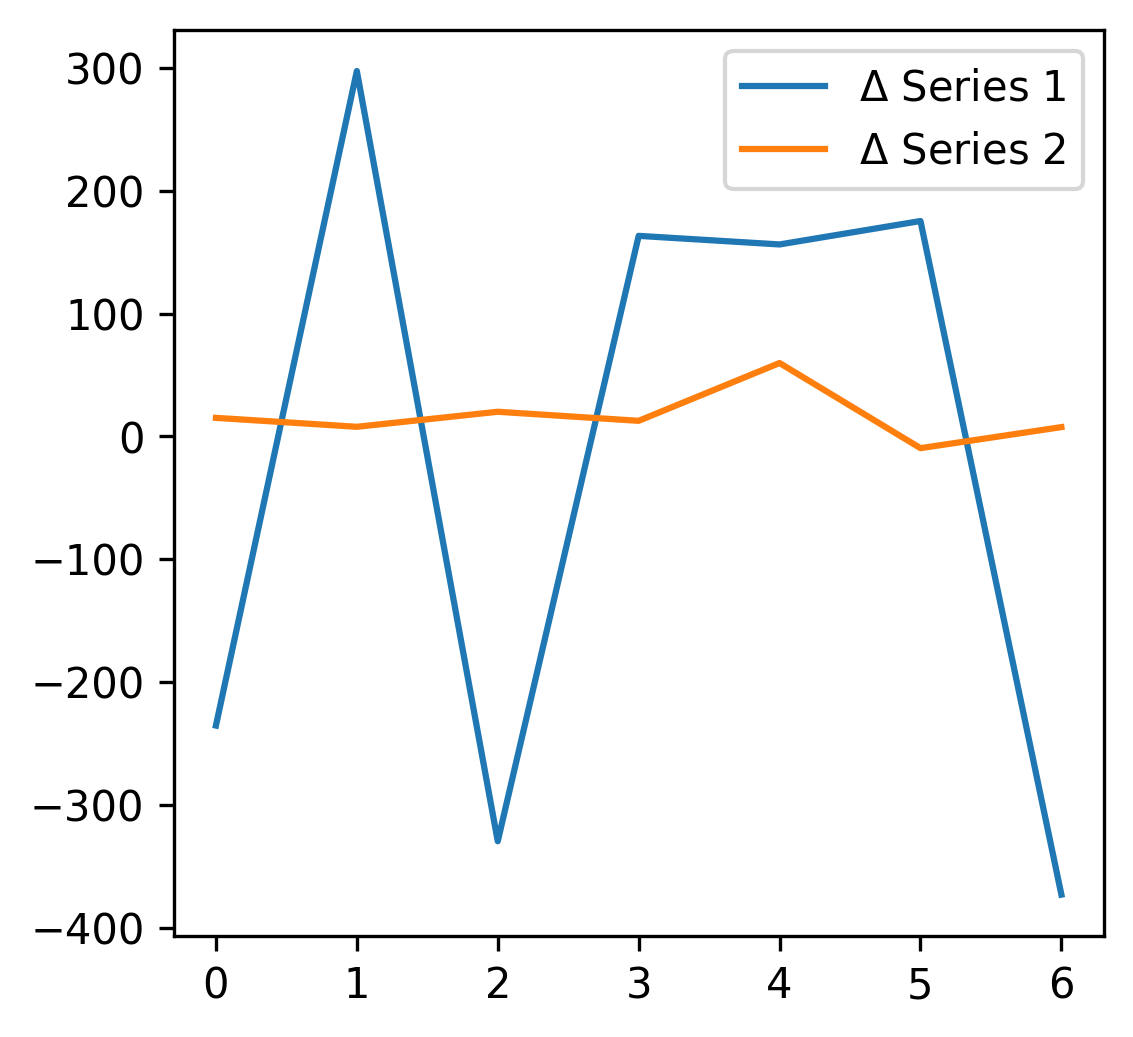

In [78]:
# element

dpi = 300 #dots per square inch when plotting...higher resolution for publications.
pyplot.rcParams['figure.dpi']= dpi
pyplot.rcParams["figure.figsize"] = [4,4]

i = 0
pyplot.title('Energy Time Series Input Data')
pyplot.plot(test_x[i,:,:],'-o')
pyplot.ylim((0,25000))

pyplot.figure()
pyplot.plot(np.arange(0,7), predictions[i,:,:],'-o')
pyplot.plot(np.arange(0,7), test_y[i,:,:],'-+')
#pyplot.plot(np.arange(0,7), test[i,:,0:2],'--')
pyplot.legend(['Prediction Series 1','Prediction Series 2', 'Actual Series 1', 'Actual Series 2'])
pyplot.title('Energy Time Series Output Data')

pyplot.figure()

delta = np.subtract(predictions, test[:,:,0:2])
print(delta.shape)
pyplot.plot(np.arange(0,7), delta[i,:,:])
pyplot.legend(['$\Delta$ Series 1','$\Delta$ Series 2'])


In [32]:
print(test[0])

[[2.08345400e+03 1.91610000e+02 3.50992120e+05 8.70360000e+03
  3.84200000e+03 4.92000000e+03 1.00740000e+04 1.58882334e+04]
 [1.60413200e+03 1.56404000e+02 3.53806730e+05 6.62320000e+03
  0.00000000e+00 2.92000000e+02 1.08120000e+04 1.56315333e+04]
 [2.21978000e+03 1.48936000e+02 3.52110290e+05 9.13980000e+03
  1.78500000e+03 2.93000000e+02 1.64680000e+04 1.84503334e+04]
 [1.77718000e+03 1.52080000e+02 3.53138130e+05 7.36140000e+03
  1.73100000e+03 3.25600000e+03 1.13590000e+04 1.32736667e+04]
 [1.76944200e+03 1.15024000e+02 3.52668330e+05 7.30040000e+03
  1.19800000e+03 2.55000000e+02 1.29360000e+04 1.51017000e+04]
 [1.79720800e+03 1.59780000e+02 3.51942930e+05 7.41800000e+03
  0.00000000e+00 9.94000000e+02 1.25310000e+04 1.64284667e+04]
 [2.33690000e+03 1.99400000e+02 3.51172420e+05 9.69620000e+03
  2.78100000e+03 4.85500000e+03 1.47340000e+04 1.65783333e+04]]


In [33]:


# pyplot.legend(['actual','predicted'])


In [38]:
predictions

array([[[ 1.55243677e+03,  1.64915863e+02],
        [ 1.54881311e+03,  1.53251129e+02],
        [ 1.60561401e+03,  1.48488617e+02],
        [ 1.62310718e+03,  1.74764374e+02],
        [ 1.62125793e+03,  1.33626312e+02],
        [ 1.62438635e+03,  2.02756805e+02],
        [ 1.65071594e+03,  1.53932098e+02]],

       [[ 1.65680688e+03,  1.56011017e+02],
        [ 1.66683533e+03,  1.45528473e+02],
        [ 1.74559155e+03,  1.45779388e+02],
        [ 1.75347754e+03,  1.78483734e+02],
        [ 1.76158508e+03,  1.32453339e+02],
        [ 1.74880139e+03,  1.76004852e+02],
        [ 1.74096619e+03,  1.78271942e+02]],

       [[ 1.21336780e+03,  3.62736206e+01],
        [ 1.34709705e+03,  9.53310852e+01],
        [ 1.31204871e+03,  8.24292908e+01],
        [ 1.27706482e+03,  1.16896210e+02],
        [ 1.28016345e+03,  1.59945404e+02],
        [ 1.33302087e+03,  5.32371521e+01],
        [ 1.43094031e+03, -5.13794250e+01]],

       [[ 1.58852954e+03,  4.15432770e+02],
        [ 1.76564795e+03, 

In [39]:
scores

[362.6673342210993,
 339.58741362817767,
 327.09921354291,
 442.67169088067385,
 364.78578357145915,
 350.1147836011994,
 474.78743680947485]

In [36]:
# Summarizing Findings (Should match blog link)

In [37]:
# summarize scores function
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

NameError: name 'score' is not defined

In [40]:
import os
dir = os.path.dirname(os.path.realpath('./'))

# Saving Session 
all_saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    all_saver.save(sess, './data-all')

tf.Session()

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'Saver'

In [41]:
from keras import backend as K


def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph



In [42]:
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

AttributeError: module 'keras.backend' has no attribute 'get_session'

In [43]:
# Save to ./model/tf_model.pb
tf.train.write_graph(frozen_graph, "model", "tf_model.pb", as_text=False)

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'write_graph'

In [44]:
!ls model

ls: model: No such file or directory


In [45]:
import tensorflow as tf
from tensorflow.python.platform import gfile

f = gfile.FastGFile("./model/tf_model.pb", 'rb')
graph_def = tf.GraphDef()
# Parses a serialized binary message into the current message.
graph_def.ParseFromString(f.read())
f.close()
with tf.Session() as sess:
    sess.graph.as_default()
# Import a serialized TensorFlow `GraphDef` protocol buffer
# and place into the current default `Graph`.
tf.import_graph_def(graph_def)

Instructions for updating:
Use tf.gfile.GFile.


AttributeError: module 'tensorflow' has no attribute 'GraphDef'

In [46]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import tensorflow as tf
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, encoding='utf-8')
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# reloading and displaying graph
from https://www.dlology.com/blog/how-to-convert-trained-keras-model-to-tensorflow-and-make-prediction/

and from https://github.com/Tony607/keras-tf-pb/blob/master/show_graph.py

In [47]:
#from show_graph import show_graph
import tensorflow as tf
# Show current session graph with TensorBoard in Jupyter Notebook.
show_graph(tf.get_default_graph().as_graph_def())

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

# Freezing Graph

In [ ]:
# exporting to onnx 

In [33]:
model.outputs


[<tf.Tensor 'lstm_1_input:0' shape=(?, 14, 8) dtype=float32>]

In [27]:
import tensorflow as tf
import tf2onnx

with tf.Session() as sess:
    #x = tf.placeholder(tf.float32, [2, 3], name="input")
    #x_ = tf.add(x, x)
    #_ = tf.identity(x_, name="output")
    onnx_graph = tf2onnx.tfonnx.process_tf_graph(sess.graph, input_names=["lstm_1_input:0"], output_names=["time_distributed_2/Reshape_1:0"])
    model_proto = onnx_graph.make_model("test")
    with open("/tmp/model.onnx", "wb") as f:
        f.write(model_proto.SerializeToString())

using tensorflow=1.5.0, onnx=1.4.1, opset=7, tfonnx=1.4.1/1ccb27


KeyError: tf.float32_ref

In [21]:
tf.Session.graph

# Keras to TensorFlow.pb

In [55]:
import os
os.makedirs('./model', exist_ok=True)
model.save('./model/keras_model.h5')

In [50]:
from keras import backend as K
# This line must be executed before loading Keras model.
K.set_learning_phase(0)

In [1]:
from keras.models import load_model
model = load_model('./model/keras_model.h5')
print(model.outputs)
# [<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]
print(model.inputs)
# [<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>]

Using TensorFlow backend.
/Users/nilmeier@us.ibm.com/anaconda2/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


[<tf.Tensor 'time_distributed_2/Reshape_1:0' shape=(?, 7, 2) dtype=float32>]
[<tf.Tensor 'lstm_1_input:0' shape=(?, 14, 8) dtype=float32>]


In [2]:
from keras import backend as K
import tensorflow as tf

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph


frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

INFO:tensorflow:Froze 45 variables.
Converted 45 variables to const ops.


In [3]:
# Save to ./model/tf_model.pb
tf.train.write_graph(frozen_graph, "model", "tf_model.pb", as_text=False)

'model/tf_model.pb'

In [6]:
import tensorflow as tf
from tensorflow.python.platform import gfile

f = gfile.FastGFile("./model/tf_model.pb", 'rb')
graph_def = tf.GraphDef()
# Parses a serialized binary message into the current message.
graph_def.ParseFromString(f.read())
f.close()

sess.graph.as_default()
# Import a serialized TensorFlow `GraphDef` protocol buffer
# and place into the current default `Graph`.
tf.import_graph_def(graph_def)

In [14]:
#from show_graph import show_graph
import tensorflow as tf
# Show current session graph with TensorBoard in Jupyter Notebook.
show_graph(tf.get_default_graph().as_graph_def())

In [36]:
tf.train.write_graph(frozen_graph, "model", "tf_model.pb", as_text=False)

onnx_graph = tf2onnx.tfonnx.process_tf_graph(frozen_graph, input_names=["lstm_1_input:0:0"], output_names=["time_distributed_2/Reshape_1:0"])





using tensorflow=1.5.0, onnx=1.4.1, opset=7, tfonnx=1.4.1/1ccb27


AttributeError: get_operations

In [40]:
print(model.inputs)
print(model.outputs)
model.summary()

[<tf.Tensor 'lstm_1_input:0' shape=(?, 14, 8) dtype=float32>]
[<tf.Tensor 'time_distributed_2/Reshape_1:0' shape=(?, 7, 2) dtype=float32>]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               167200    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 7, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 200)            320800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 7, 100)            20100     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 7, 2)              202       
Total params: 508,302
Trainable params: 508,302
Non-trainable params: 0
_______________________________________________________________